In [1]:
!pip install matplotlib scikit-learn pandas --quiet


[notice] A new release of pip available: 22.3 -> 25.3
[notice] To update, run: C:\Users\DELL\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [11]:
import os
os.getcwd()
os.listdir()


['.ipynb_checkpoints', 'Employee_Salary.xlsx', 'Untitled.ipynb']

In [33]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [13]:
df = pd.read_csv("Employee_Salary.csv")
df.head()

,Name,Age,Net_Pay
0,Keven Norman,25,71494
1,Kristin Werner,26,39971
2,Avery Barber,24,77705
3,Boris Gibson,26,40164
4,Leif Mack,29,143963


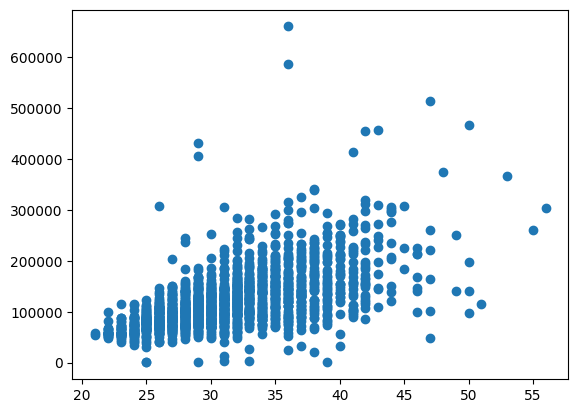

In [14]:
plt.scatter(df['Age'], df['Net_Pay'])

In [60]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['Age', 'Net_Pay']])

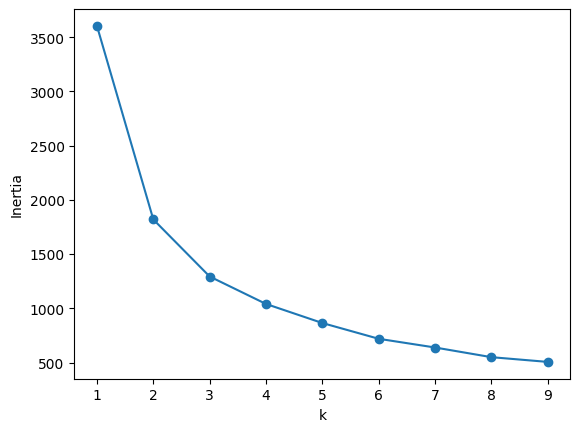

[3603.999999999999,
 1819.264849505616,
 1293.177710568952,
 1040.0236257805586,
 864.1730038961165,
 718.7632907418968,
 638.4671934637768,
 549.3359767668836,
 505.6122066752338]

In [67]:
# to find the elbow - find the sse and then plot the graph
# find the K value
# inertia holds the sse 

inertia = []
K = range(1, 10)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

plt.plot(K, inertia, marker='o')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()
inertia # the values of sse

In [53]:
#After the preprocessing 
# KMeans Algorithm - Applied

km = KMeans(n_clusters=3)
km
# km.fit(X_scaled)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [62]:
#labeling the clusters
#plot the clusters

labels = km.labels_
df['Cluster'] = labels
df.head()

,Name,Age,Net_Pay,Cluster
0,Keven Norman,25,71494,2
1,Kristin Werner,26,39971,2
2,Avery Barber,24,77705,2
3,Boris Gibson,26,40164,2
4,Leif Mack,29,143963,0


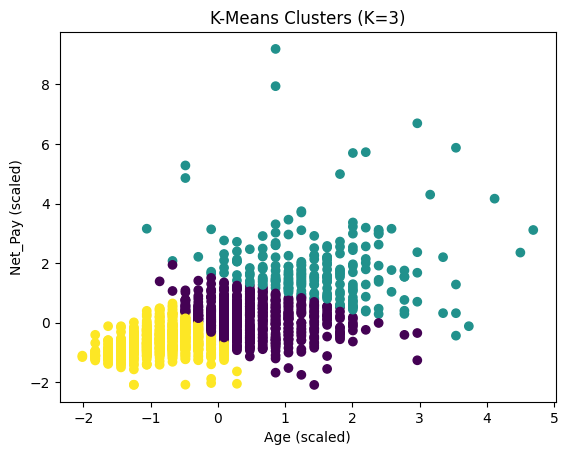

In [63]:
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels)
plt.xlabel('Age (scaled)')
plt.ylabel('Net_Pay (scaled)')
plt.title('K-Means Clusters (K=3)')
plt.show()

In [64]:
#Step A — Evaluate cluster quality 
# using - Silhouette score
#0.4 - acceptable

sil_score = silhouette_score(X_scaled, labels)
sil_score

0.40340195661736833

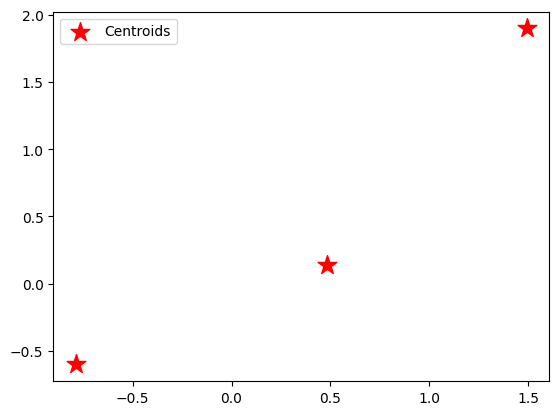

array([[ 0.4804448 ,  0.13514675],
       [ 1.49236518,  1.89651578],
       [-0.78776932, -0.60152031]])

In [65]:
#make the centers clusters 
#Centroid

centers = km.cluster_centers_
plt.scatter(centers[:,0], centers[:,1],
            color='red', marker='*', s=200, label='Centroids')
plt.legend()
plt.show()
centers

In [36]:
#find the original values of centers

original_centers = scaler.inverse_transform(centers)
original_centers

array([[3.40263158e+01, 1.30370470e+05],
       [3.93122172e+01, 2.33544371e+05],
       [2.74016298e+01, 8.72194808e+04]])

In [38]:
#groupby based on cluster determinations

df.groupby('Cluster')[['Age', 'Net_Pay']].mean()

,Age,Net_Pay
Cluster,,
0,34.031900,130381.418863
1,39.312217,233544.371041
2,27.404651,87260.476744
